# Clustering peptides

In PepFunn we provide three different ways to cluster a peptide library based on the chemical information, their phys-chem properties or just the amino acid sequence. In this tutorial we provide examples about these three cases using a library built with PepFuNN

Before starting, the pepfunn package can be installed as follows:

In [ ]:
!pip install --user pepfunn

Another way is to download the gihub code and running locally in the same folder: `pip install -e .`

### 1. Clustering based on the chemical structure

For this example a library of 100 peptides is built using the internal function. We cluster the molecules by converting them to Molfile format and then use the Butina method with their molecular fingeprints. First we generate the library:

In [1]:
from pepfunn.library import Library

libtest=Library(population_size=100, mode='scanning', mode_scan='all', seeds=['FNCREWCWN'], pairs=[(1,'A'),(4,'L'),(6,'R'),(8,'M')], positions=[2,3,5,7], from_child=True, verbose=False)
sequences=libtest.population

Then we call the simClustering class available in the clustering.py file

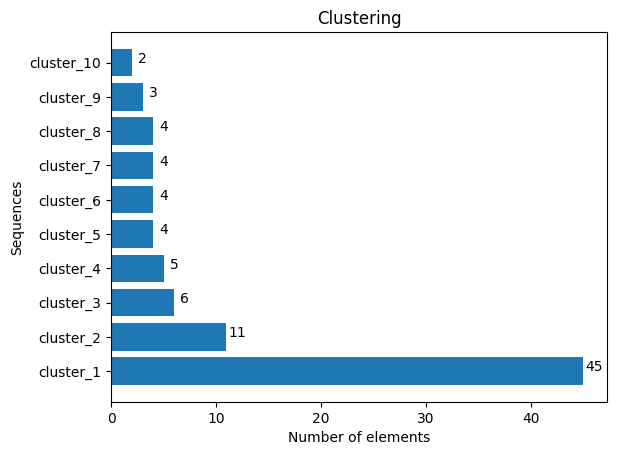

In [2]:
from pepfunn.clustering import simClustering

clust = simClustering(sequences=sequences)
clust.run_clustering()
centroids = clust.get_centroids()
clust.plot_clusters(centroids)

We can find some neighbors based on a reference molecule to the full set, a single cluster or between clusters:

In [7]:
# Calculate neighbors for one molecule
neighbors=clust.get_sim_reference('mol1')

top10=[]
for i,comp in enumerate(neighbors):
    top10.append(comp)
    if i==10:
        break
        
print(f'The top 10 closest neighbors of mol1 are: {top10[1:]}')

The top 10 closest neighbors of mol1 are: ['mol76', 'mol19', 'mol47', 'mol6', 'mol3', 'mol100', 'mol32', 'mol49', 'mol14', 'mol9']


In [9]:
# Calculate neighbors for one molecule
neighbors=clust.get_sim_cluster('mol1')

top10=[]
for i,comp in enumerate(neighbors):
    top10.append(comp)
    if i==10:
        break
        
print(f'The top 10 closest neighbors of mol1 in its cluster are: {top10[1:]}')

The top 10 closest neighbors of mol1 in its cluster are: ['mol19', 'mol47', 'mol6', 'mol3', 'mol100', 'mol32', 'mol49', 'mol14', 'mol9', 'mol43']


In [11]:
# Compare average similarity between cluster1 and cluster2
sim=clust.compare_clusters(1, 2)
print(f'The avg similarity between cluster1 and cluster 2 is: {sim}')

The avg similarity between cluster1 and cluster 2 is: 0.6182850472155261


Finally we can make a t-SNE plot of the clusters

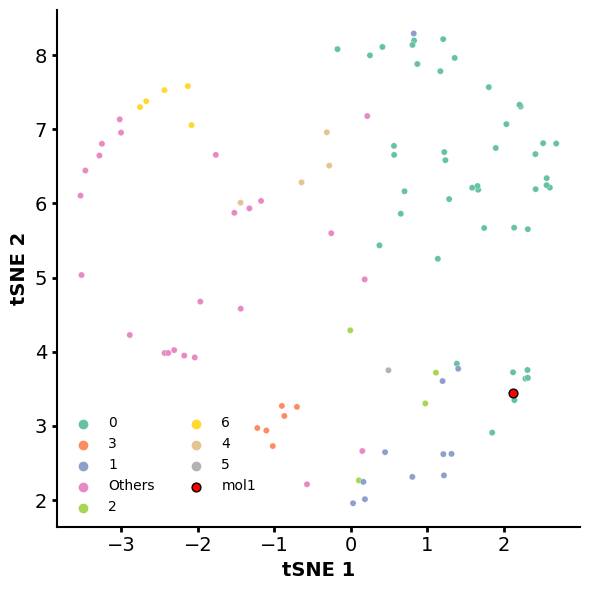

In [3]:
clust.plot_sim_space(reference=['mol1'], add_cluster_color=True, legends=True, out_name='cluster.png')

The main options included in the latest function are:

- **reference:** List with ids that will be highlighted in the final plot.
- **add_cluster_color:** Flag to add colors based on the calculated clusters.
- **legends:** Flag to plot the legends.
- **out_name:** Name of the file generated with the plot.

### 2. Clustering based on their properties

Another alternative is to cluster based on a set of calculated phys-chem properties. For this we can use the propClustering class with the same library from the previous example:

In [4]:
from pepfunn.clustering import propClustering

# Run property clustering
pc = propClustering(sequences=sequences)

Here we can calculate euclidean distance to check the closest neighbors to a reference molecule:

In [5]:
df=pc.calc_distances(['mol1'])
df

,mol1
mol1,0.000000
mol2,3.215565
mol3,5.090829
mol4,2.009383
mol5,3.044318
...,...
mol96,3.028425
mol97,10.799337
mol98,2.012255
mol99,2.849696


Finally we can plot the PCA components and cluster them using K-means:

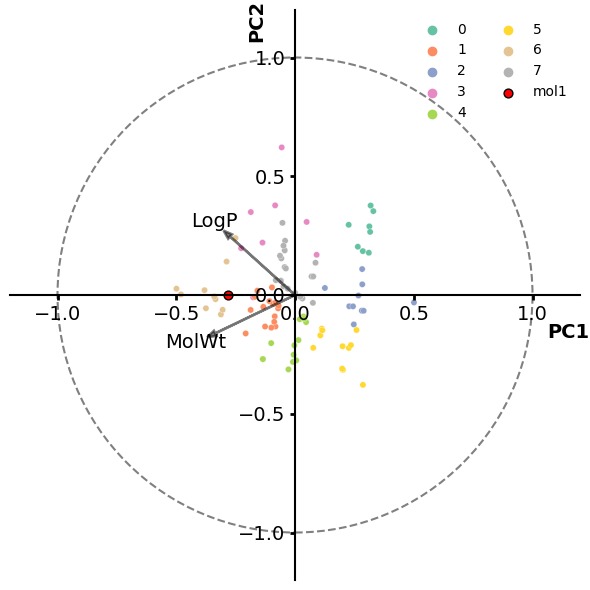

In [6]:
pc.plot_PCA(reference=['mol1'], add_cluster=True, print_arrows=True, legends=True, out_name='properties.png')

Here the main options are:

- **reference:** List with ids that will be highlighted in the final plot.
- **add_cluster:** Flag to add colors based on the calculated clusters.
- **print_arrows:** Flag to print arrows with the main properties.
- **legends:** Flag to plot the legends.
- **out_name:** Name of the file generated with the plot.

### 3. Clustering based on the sequence

Finally we can use the amino acid sequence to cluster the molecules following a distance-based approach explained in the manuscript. This is an example using the same library from the previous cases:

In [8]:
from pepfunn.clustering import sequence_clustering

clusters, clus_ids, isolated, iso_ids, df_clus = sequence_clustering(sequences=sequences, threshold=0.8)
df_clus

,ID,cluster_id,sequence
0,mol2,1,FNCRAWCWN
1,mol4,1,ANCRWWCWN
2,mol5,1,FNCRKWCWN
3,mol8,1,FNCRWWEWN
4,mol40,1,FNCRWWWWN
...,...,...,...
98,mol80,5,ANRRKWKWN
99,mol88,5,ARCLWWYWN
100,mol91,5,AMHRWWYWN
101,mol98,5,ANHRVWYWN


The `threshold` is used to define how similar the sequence should be to be included in a cluster. Those not acomplishing the criteria are available in the `isolated` object.

For any questions, please contact: raoc@novonordisk.com